# Graduate Rotational Internship Program of **The Sparks Foundation**
<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## TASK-2:- To Explore Unsupervised Machine Learning

<b>------------------------------------------------------------------------------------------------------------------------</b>

##  Problem statement

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

It is very important to note, we actually have the labels for this data set, but we will NOT use them for the <b>KMeans clustering</b> algorithm, since that is an unsupervised learning algorithm

### A) Import all required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas_profiling

In [2]:
%matplotlib inline

Read the data from the link of the data as below

In [3]:
data = pd.read_csv("iris.csv")

Get the data of above five lines

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### B) To find cluster in k-means

Finding the optimum number of clusters for k-means classification


In [7]:
x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

 Plotting the results onto a line graph, allowing us to observe 'The elbow'

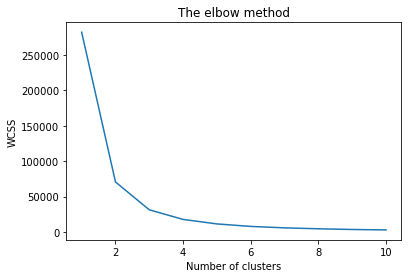

In [8]:
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

Create K-means classifiers

In [9]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

Visualising the clusters - On the first two columns

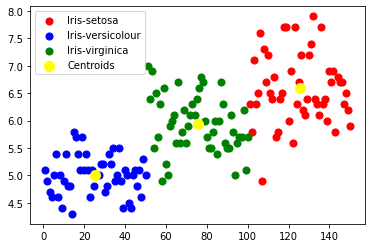

In [10]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'r', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'b', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 50, c = 'g', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

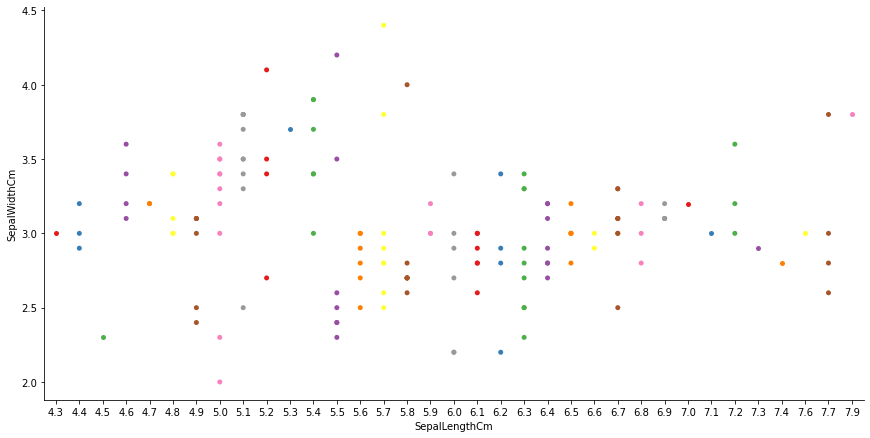

In [11]:
sns.catplot(x="SepalLengthCm", y="SepalWidthCm",jitter = False, data=data, palette='Set1',height=6, aspect=2)

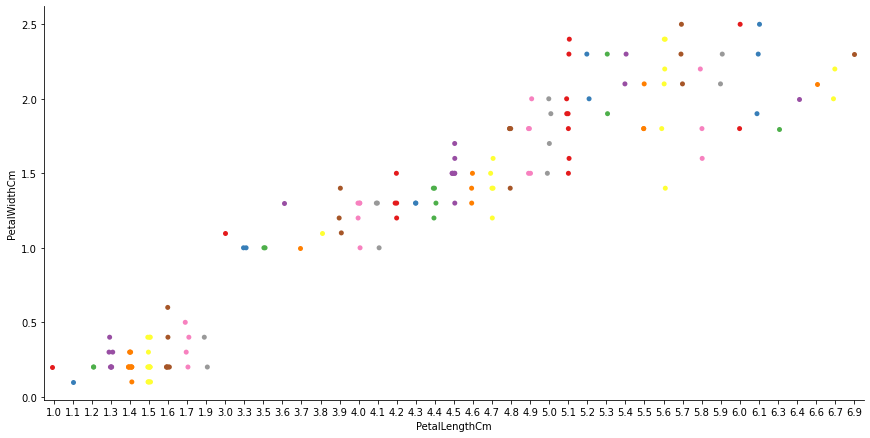

In [12]:
sns.catplot(x="PetalLengthCm", y="PetalWidthCm", data=data, palette='Set1',height=6, aspect=2)


### C) K Means Cluster Creation

In [13]:
from sklearn.cluster import KMeans

Create a model with 2 clusters

In [14]:
kmeans = KMeans(n_clusters=2)

In [15]:
kmeans.fit(data.drop('Species',axis=1))

KMeans(n_clusters=2)

In [16]:
kmeans.cluster_centers_

array([[ 38.        ,   5.34133333,   3.204     ,   2.41333333,
          0.61066667],
       [113.        ,   6.34533333,   2.904     ,   5.104     ,
          1.78666667]])

### D) Convert some catagorical data into numerical form

In [17]:
def converter(Species):
    if Species=='Iris-setosa':
        return 1
    elif Species=='Iris-versicolor':
        return 2
    else:
        return 0

In [18]:
data['Species'] = data['Species'].apply(converter)

In [19]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


### E) To get the accuracy we can use Confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(data['Species'],kmeans.labels_))
print(classification_report(data['Species'],kmeans.labels_))

[[ 0 50  0]
 [50  0  0]
 [25 25  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      50.0
           1       0.00      0.00      0.00      50.0
           2       0.00      0.00      0.00      50.0

    accuracy                           0.00     150.0
   macro avg       0.00      0.00      0.00     150.0
weighted avg       0.00      0.00      0.00     150.0



C:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
